# ASSIGNMENT

## Data Wrangling

In [857]:
# Import the library to read the data
import pandas as pd
df_imdb = pd.read_csv('assignment.csv')

**Data Cleaning To Dos**
- Check for duplicates
- Rename the columns
- Fix the release year inconsistent rows
- Fix inconsistent country naming (US -> USA)
- Replace duration NaN values
- Remove units in Income for arithemetics purpose
- correct inconsistencies in Score 

In [858]:
# Check if data is duplicated
df_imdb.duplicated().sum()

0

In [859]:
# Convert columns to lower_case
df_imdb.columns= df_imdb.columns.str.lower()

In [860]:
# Create a dictionary to map old column names to new column names
new_column_names = {
    'imbd title id': 'imdb_title_id',
    'release year': 'release_year',
    'original titlê': 'original_title',
    'content rating': 'content_rating',
    'genrë¨': 'genre',
    ' votes ': 'votes'
}
# Rename the old columns using the dictionary new_column_names
df_imdb.rename(columns=new_column_names, inplace=True)

In [861]:
# delete redundant column "unnamed: 0"
del df_imdb['unnamed: 0']

In [862]:
# delete empty column "unnamed: 8"
del df_imdb['unnamed: 8']

In [863]:
# Drop rows with NaN data
df_imdb = df_imdb.drop(13)
df_imdb=df_imdb.reset_index(drop=True)

In [864]:
# replace values in the 'Country' column
replace_country = {
    'US': 'USA',
    'Italy1': 'Italy',
    'New Zeland': 'New Zealand',
    'New Zesland': 'New Zealand',
    'West Germany': 'Germany'
}
df_imdb['country']=df_imdb['country'].replace(replace_country)

In [865]:
# "1984-02-34" changed to "1984-03-05" since there are 29 days in 1984
# "1976-13-24" changed to "1977-01-24"
# The 6th of marzo, year 1951' changed to "1951-03-06": marzo(spanish) = march(english)
replace_year = {
    ' 23 -07-2008': '2008-07-23',
    "1984-02-34": "1984-03-05",
    "1976-13-24": "1977-01-24",
    'The 6th of marzo, year 1951': '1951-03-06',
    '23rd December of 1966 ': '1966-12-23',
    '01/16-03': '2003-01-16',
    '21-11-46': '2046-11-21',
    '18/11/1976': '1976-11-18',
    '10-29-99': '1999-10-29',
    '22 Feb 04': '2004-02-22',
    '09 21 1972': '1972-09-21',
}
df_imdb['release_year']=df_imdb['release_year'].replace(replace_year)

In [866]:
# Replace movies without rating with "Unrated"
replace_rating = {
    "Not Rated":"Unrated",
    "Approved": "Unrated",
}
df_imdb['content_rating'] = df_imdb['content_rating'].replace(replace_rating)

In [867]:
# Check for "NaN" values in the content_rating column and replace them with "No Rating"
df_imdb.loc[df_imdb['content_rating'].isna(), 'content_rating'] = "Unrated"

In [868]:
# Check NaN values in duration
nan_duration = df_imdb[df_imdb['duration'].isna()]
nan_duration

,imdb_title_id,original_title,release_year,genre,duration,country,content_rating,director,income,votes,score
13,tt0133093,The Matrix,1999-05-07,"Action, Sci-Fi",NaN,USA,R,"Lana Wachowski, Lilly Wachowski",$ 465718588,1.632.315,++8.7


In [869]:
# search online : what is duration of the imdb The Matrix released in year 1999-05-07?
# replace duration
df_imdb['duration'][13] = "136"

In [870]:
# check for number of movies without duration
count = (df_imdb['duration'] == " ").sum()
count

1

In [871]:
# search online : what is duration of the imdb Pulp Fiction released in year 1994-10-28?
# replace duration
df_imdb['duration'][4] = "154"

In [872]:
# replace unit-sign  and 'o'  and convert to float for arithmetic operation
df_imdb['income'] = df_imdb['income'].astype(str).str.replace('$', '', regex=False).str.replace('o', '0').str.replace(',', '').astype(float)

In [873]:
# calculate the total income
total_income = df_imdb['income'].sum()
df_imdb['total_income'] = total_income

In [874]:
# scores formatting
import re

# Define the regular expression pattern
pattern = r'[f,+e.0:-]'

# Apply the regex pattern using replace()
df_imdb['score'] = df_imdb['score'].str.replace(pattern, '', regex=True)

# Convert the column to string data type
df_imdb['score'] = df_imdb['score'].astype(str)

# Add a decimal point after the first digit
df_imdb['score'] = df_imdb['score'].apply(lambda x: x[0] + '.' + x[1:])

# Convert the column back to numeric data
df_imdb['score'] = pd.to_numeric(df_imdb['score'], errors='coerce')

# list out all items in score
column_values = df_imdb['score'].tolist()
print(column_values)

[9.3, 9.2, 9.0, 9.0, 8.9, 8.9, 8.9, 8.9, 8.8, 8.8, 8.8, 8.8, 8.8, 8.7, 8.7, 8.7, 8.7, 8.7, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.9, 7.9, 7.9, 7.9, 7.9, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.7, 7.7, 7.7, 7.7, 7.6, 7.6, 7.6, 7.6, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.4, 7.4, 7.4]


In [875]:
pd.DataFrame(data=df_imdb)

,imdb_title_id,original_title,release_year,genre,duration,country,content_rating,director,income,votes,score,total_income
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,2.881524e+07,2.278.845,9.3,2.991255e+10
1,tt0068646,The Godfather,1972-09-21,"Crime, Drama",175,USA,R,Francis Ford Coppola,2.461210e+08,1.572.674,9.2,2.991255e+10
2,tt0468569,The Dark Knight,2008-07-23,"Action, Crime, Drama",152,USA,PG-13,Christopher Nolan,1.005455e+09,2.241.615,9.0,2.991255e+10
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,4.080358e+08,1.098.714,9.0,2.991255e+10
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",154,USA,R,Quentin Tarantino,2.228318e+08,1.780.147,8.9,2.991255e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
95,tt0070735,The Sting,1974-03-21,"Comedy, Crime, Drama",129,USA,PG,George Roy Hill,1.560000e+08,236.285,7.5,2.991255e+10
96,tt0082096,Das Boot,1982-03-18,"Adventure, Drama, Thriller",149,Germany,R,Wolfgang Petersen,1.148768e+07,226.427,7.5,2.991255e+10
97,tt0059578,Per qualche dollaro in piÃ¹,1965-12-20,Western,132,Italy,Unrated,Sergio Leone,1.500000e+07,226.039,7.4,2.991255e+10
98,tt1832382,Jodaeiye Nader az Simin,2011-10-21,Drama,123,Iran,PG-13,Asghar Farhadi,2.292608e+07,214.165,7.4,2.991255e+10


<Axes: xlabel='count', ylabel='country'>

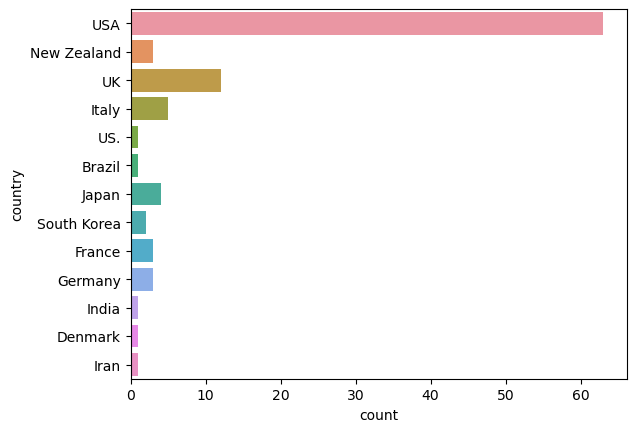

In [876]:
import seaborn as sns
sns.countplot(data=df_imdb, y='country')